In [35]:
import pandas as pd


#df= pd.read_excel('df_content.xlsx')
df= pd.read_excel('search_results_articles.xlsx')

In [36]:
df.head()

,Query,Engine,Title,Dates,Link
0,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,2 weeks ago,https://www.seashepherdglobal.org/latest-news/...
1,Vessel caught misreporting catch amount,Google,Move the IUU Fight Up the Food Chain | Proceed...,"Oct 31, 2023",https://www.usni.org/magazines/proceedings/202...
2,Vessel caught misreporting catch amount,Google,New rules tighten controls on EU…,1 month ago,https://ejfoundation.org/news-media/new-rules-...
3,Vessel caught misreporting catch amount,Google,Surprise! Media is misreporting the source of ...,"Jul 26, 2023",https://electrek.co/2023/07/26/surprise-media-...
4,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,"Mar 25, 2024",https://www.seashepherdglobal.org/latest-news/...


In [37]:
df.describe()

,Query,Engine,Title,Dates,Link
count,295,295,295,295,295
unique,10,3,224,169,235
top,Vessel caught with incorrect catch reports,Google,Two vessels catch fire after missile strikes o...,12d,https://www.gmanetwork.com/regionaltv/news/102...
freq,38,154,10,23,6


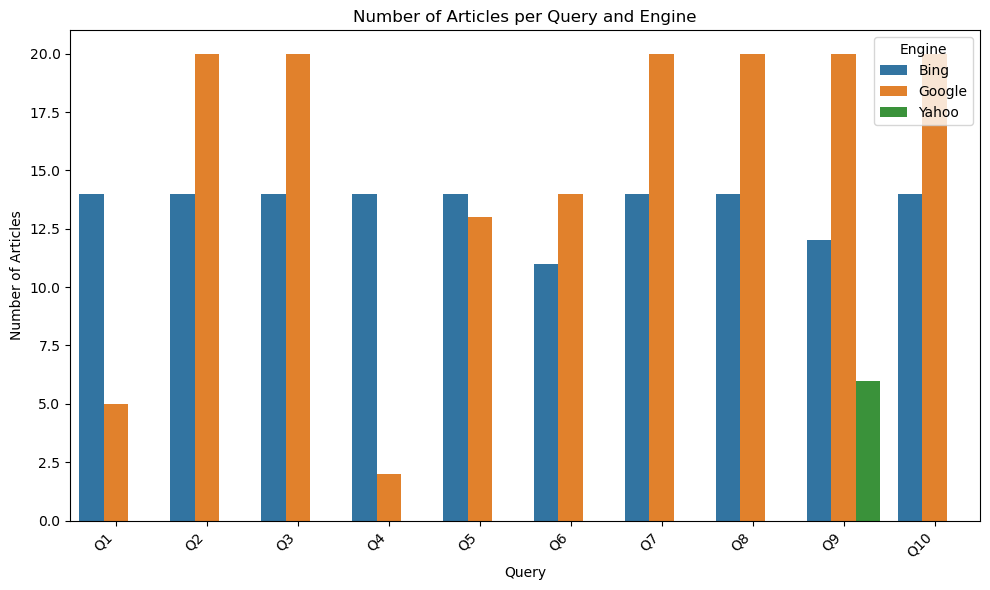

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns



# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)]  # Adjust range as per your actual number of queries


# Group by 'Query' and 'Engine' to count number of articles
article_counts = df.groupby(['Query', 'Engine']).size().reset_index(name='Article Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Query', y='Article Count', hue='Engine', data=article_counts)
plt.title('Number of Articles per Query and Engine')
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()

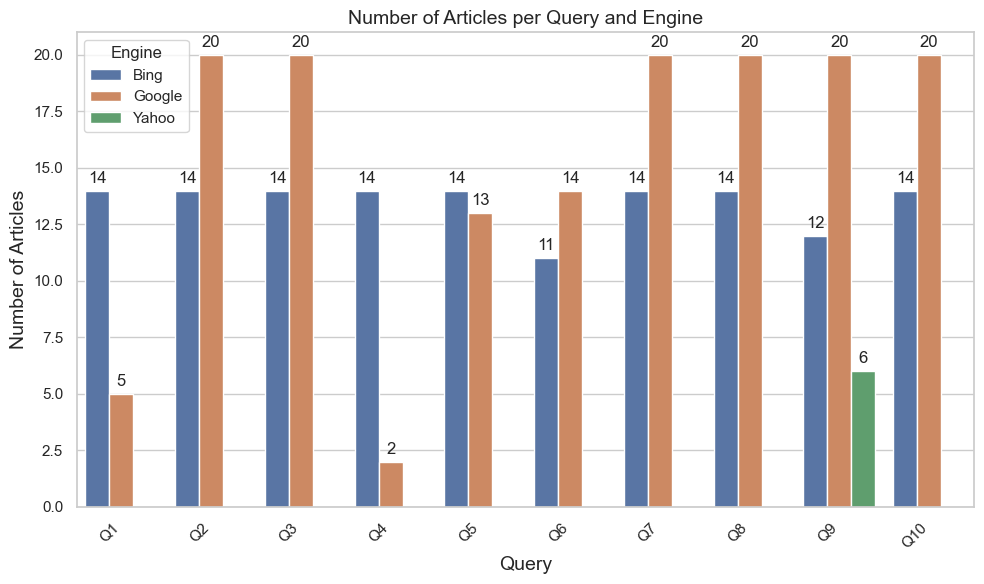

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)]  # Adjust range as per your actual number of queries

# Group by 'Query' and 'Engine' to count number of articles
article_counts = df.groupby(['Query', 'Engine']).size().reset_index(name='Article Count')

# Set up seaborn style and font scale
#sns.set(style="whitegrid")
#sns.set_context("paper", font_scale=1.2)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Query', y='Article Count', hue='Engine', data=article_counts)
plt.title('Number of Articles per Query and Engine', fontsize=14)
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine', loc='upper left')

# Adding the values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()


## Traying to use boxplot or violinplot

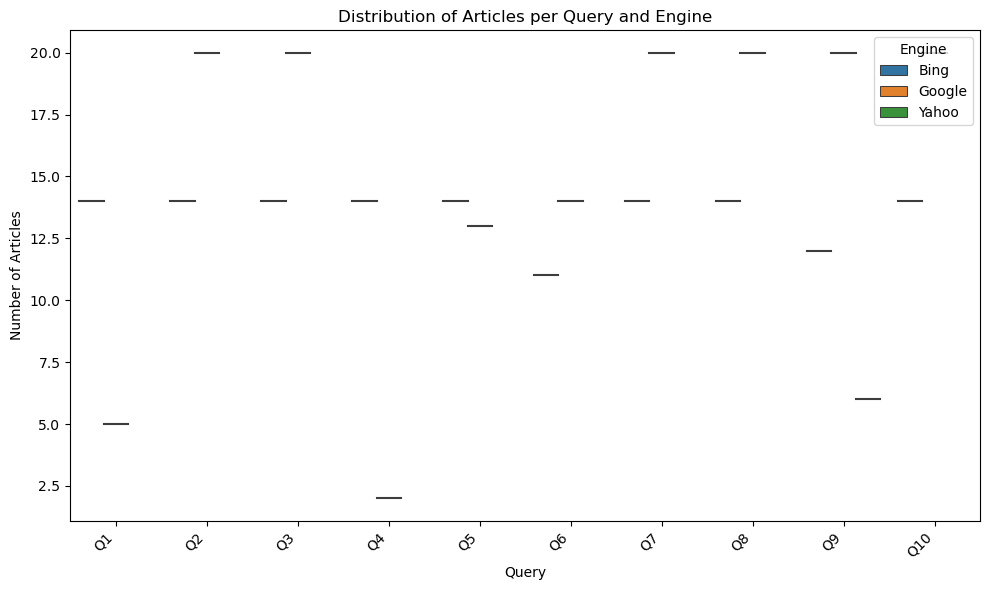

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)]  # Adjust range as per your actual number of queries

# Group by 'Query' and 'Engine' to count number of articles
article_counts = df.groupby(['Query', 'Engine']).size().reset_index(name='Article Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Query', y='Article Count', hue='Engine', data=article_counts, fill=False)
plt.title('Distribution of Articles per Query and Engine')
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()


## or use this one

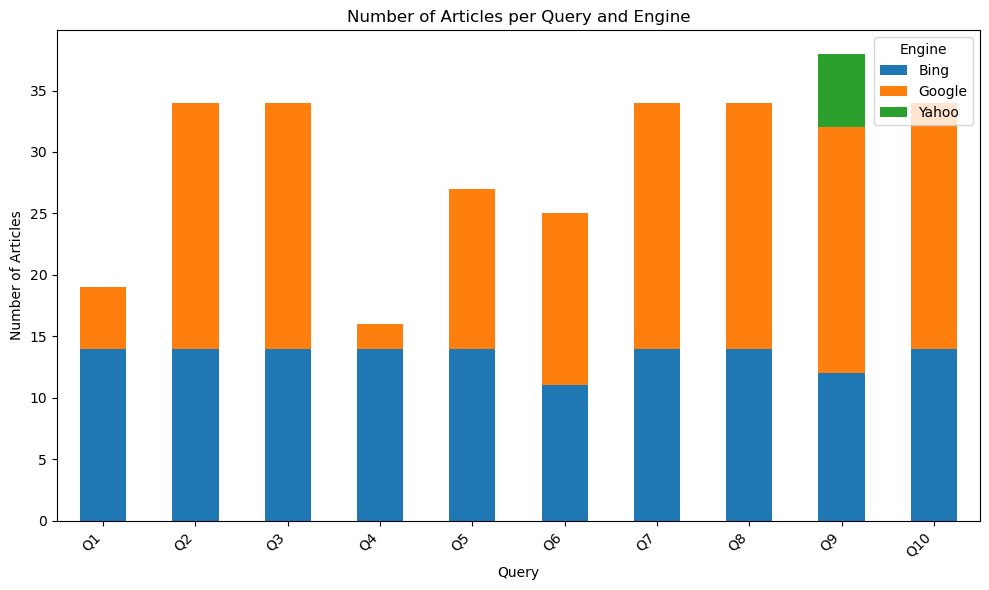

In [25]:
# Group by 'Query' and 'Engine' to count number of articles
article_counts = df.groupby(['Query', 'Engine']).size().unstack(fill_value=0)

# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)] 

# Plotting a stacked bar chart
plt.figure(figsize=(10, 6))
article_counts.plot(kind='bar', stacked=True,  ax=plt.gca())
plt.title('Number of Articles per Query and Engine')
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()

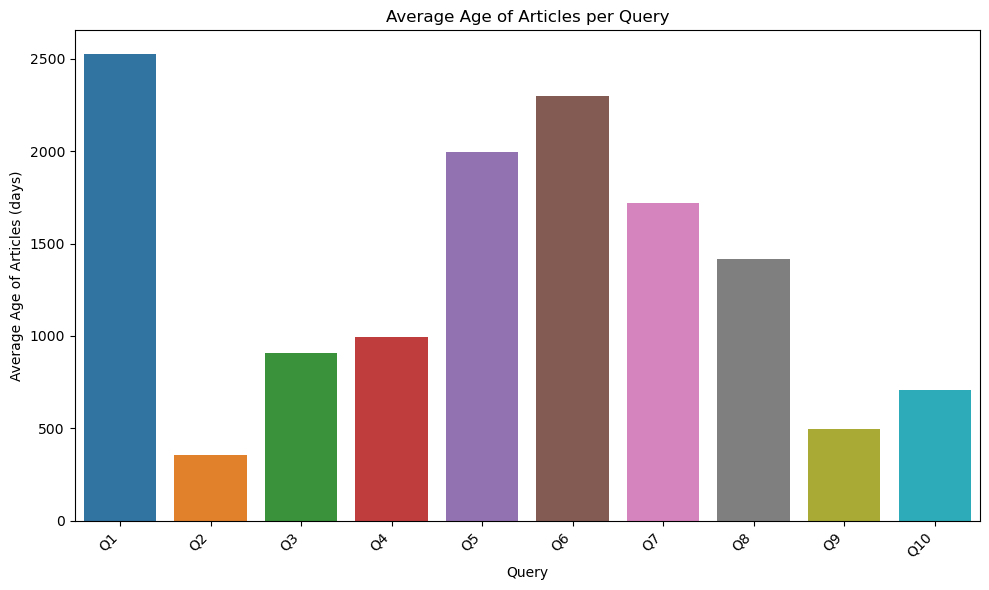

In [24]:
from datetime import datetime

# Convert 'Dates' to datetime and calculate article age
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')
df['Article Age'] = (datetime.now() - df['Dates']).dt.days

# Group by 'Query' and calculate average article age
average_age_per_query = df.groupby('Query')['Article Age'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Query', y='Article Age', data=average_age_per_query)
plt.title('Average Age of Articles per Query')
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names

plt.xlabel('Query')
plt.ylabel('Average Age of Articles (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

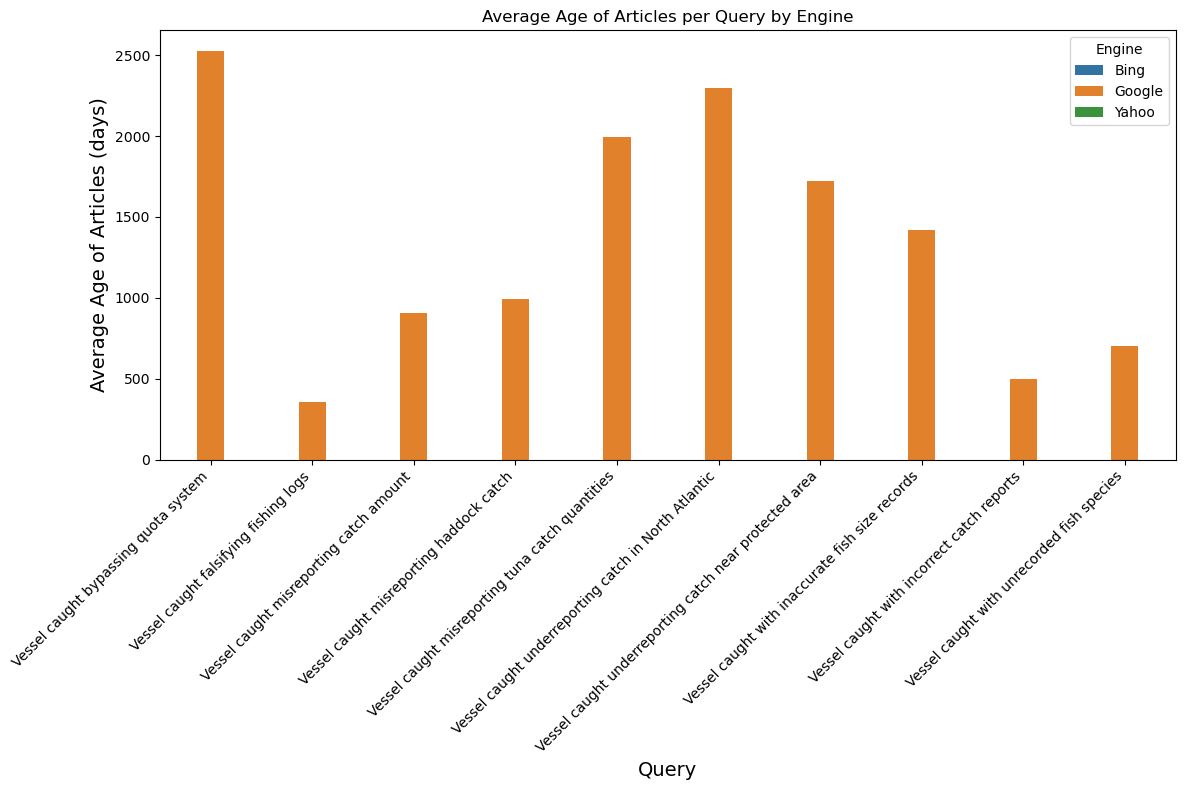

In [45]:
# Convert 'Dates' to datetime and calculate article age
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')
df['Article Age'] = (datetime.now() - df['Dates']).dt.days

# Group by 'Query' and 'Engine' and calculate average article age
average_age_per_query_engine = df.groupby(['Query', 'Engine'])['Article Age'].mean().reset_index()

# Adjusting age for Google articles
df.loc[df['Engine'] == 'Google', 'Article Age'] /= 1000

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Query', y='Article Age', hue='Engine', data=average_age_per_query_engine)
plt.title('Average Age of Articles per Query by Engine')
plt.xlabel('Query', fontsize=14)
plt.ylabel('Average Age of Articles (days)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()

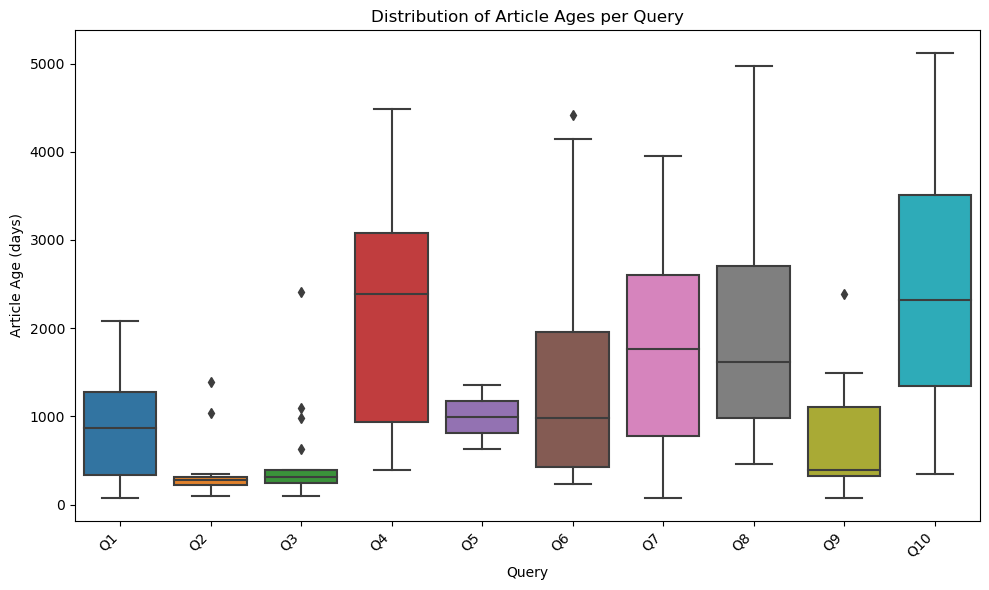

In [23]:
# Convert 'Dates' to datetime and calculate article age
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')
df['Article Age'] = (datetime.now() - df['Dates']).dt.days

# Plotting a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Query', y='Article Age', data=df)
plt.title('Distribution of Article Ages per Query')
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Article Age (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

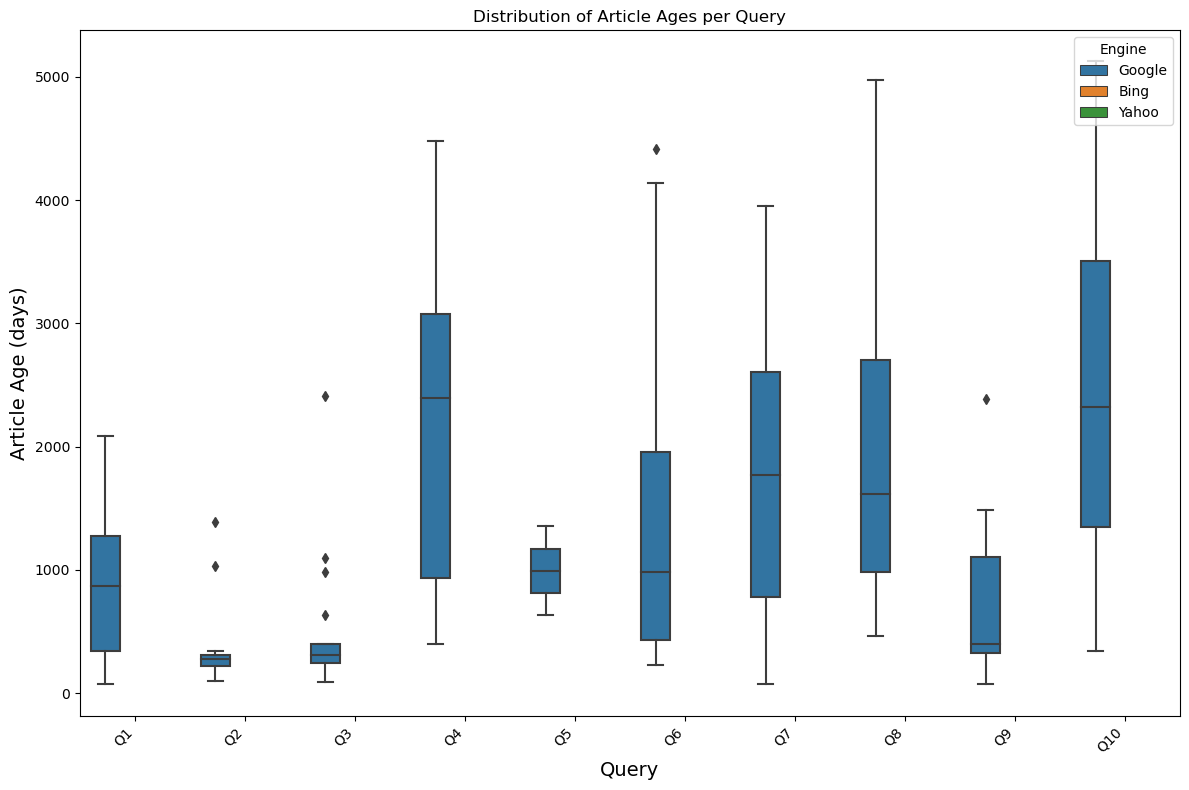

In [43]:
# Convert 'Dates' to datetime and calculate article age
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')
df['Article Age'] = (datetime.now() - df['Dates']).dt.days

# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, len(df['Query'].unique()) + 1)]  # Adjust based on your data

# Plotting a box plot grouped by engine
plt.figure(figsize=(12, 8))
sns.boxplot(x='Query', y='Article Age', hue='Engine', data=df)
plt.title('Distribution of Article Ages per Query')
plt.xticks(ticks=range(len(query_names)), labels=query_names, rotation=45, ha='right')  # Set xticks with query names
plt.xlabel('Query', fontsize=14)
plt.ylabel('Article Age (days)', fontsize=14)
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()

## Does not work well

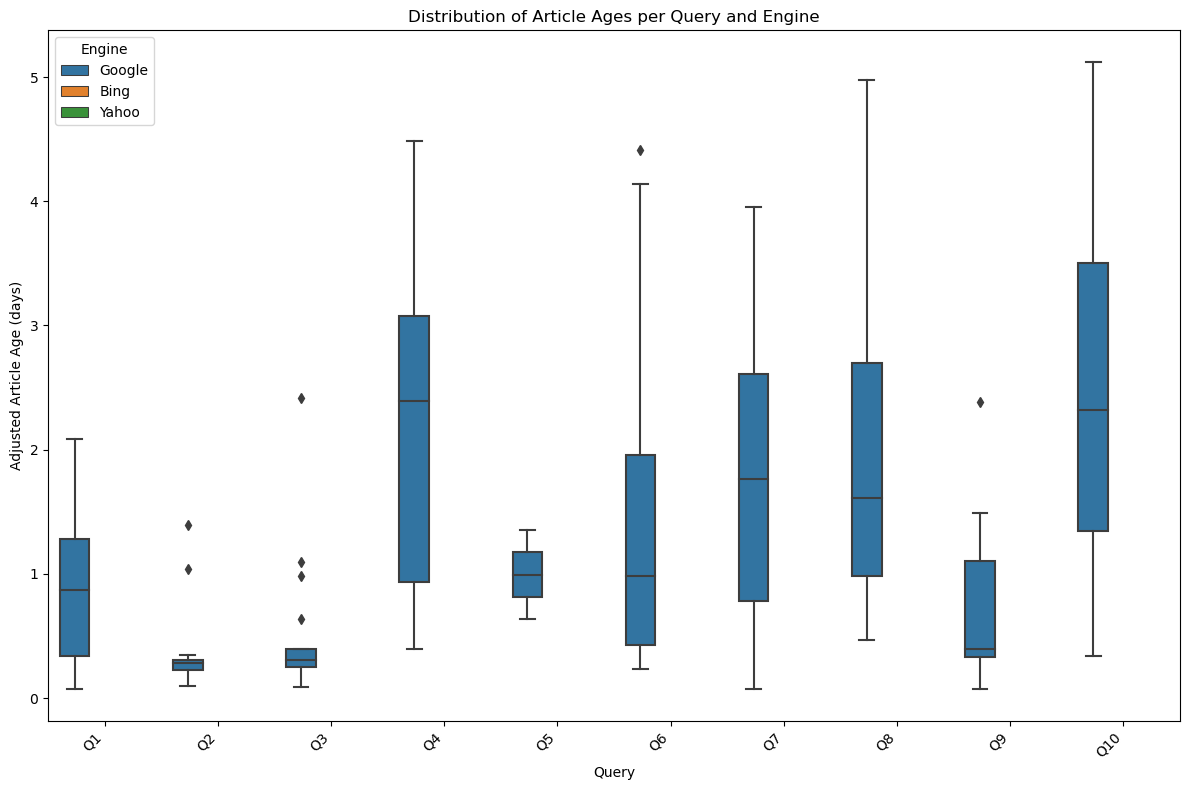

In [22]:
# Convert 'Dates' to datetime and calculate article age
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')
df['Article Age'] = (datetime.now() - df['Dates']).dt.days

# Adjusting age for Google articles
df.loc[df['Engine'] == 'Google', 'Article Age'] /= 1000

# Plotting a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Query', y='Article Age', hue='Engine', data=df)
plt.title('Distribution of Article Ages per Query and Engine')
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names

plt.xlabel('Query')
plt.ylabel('Adjusted Article Age (days)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine', loc='best')
plt.tight_layout()
plt.show()